ved khedkar
# **added some data visualizations.**

In [6]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
forestfires = pd.read_csv("forestfires.csv")

In [3]:
#As dummy variables are already created, we will remove the month and alsoday columns
forestfires.drop(["month","day"],axis=1,inplace = True)

In [4]:
forestfires["size_category"].value_counts()
forestfires.isnull().sum()
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
## taking small as 0 and large as 1
forestfires.loc[forestfires["size_category"]=='small','size_category']=0
forestfires.loc[forestfires["size_category"]=='large','size_category']=1
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

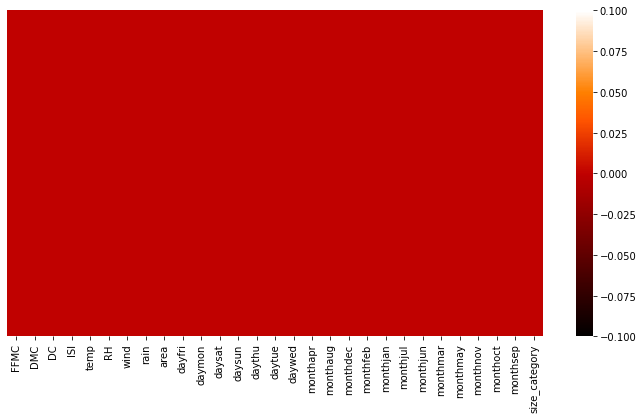

In [7]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(forestfires.isna(), cmap =('gist_heat'), yticklabels=False)

# **Data Visualisation**

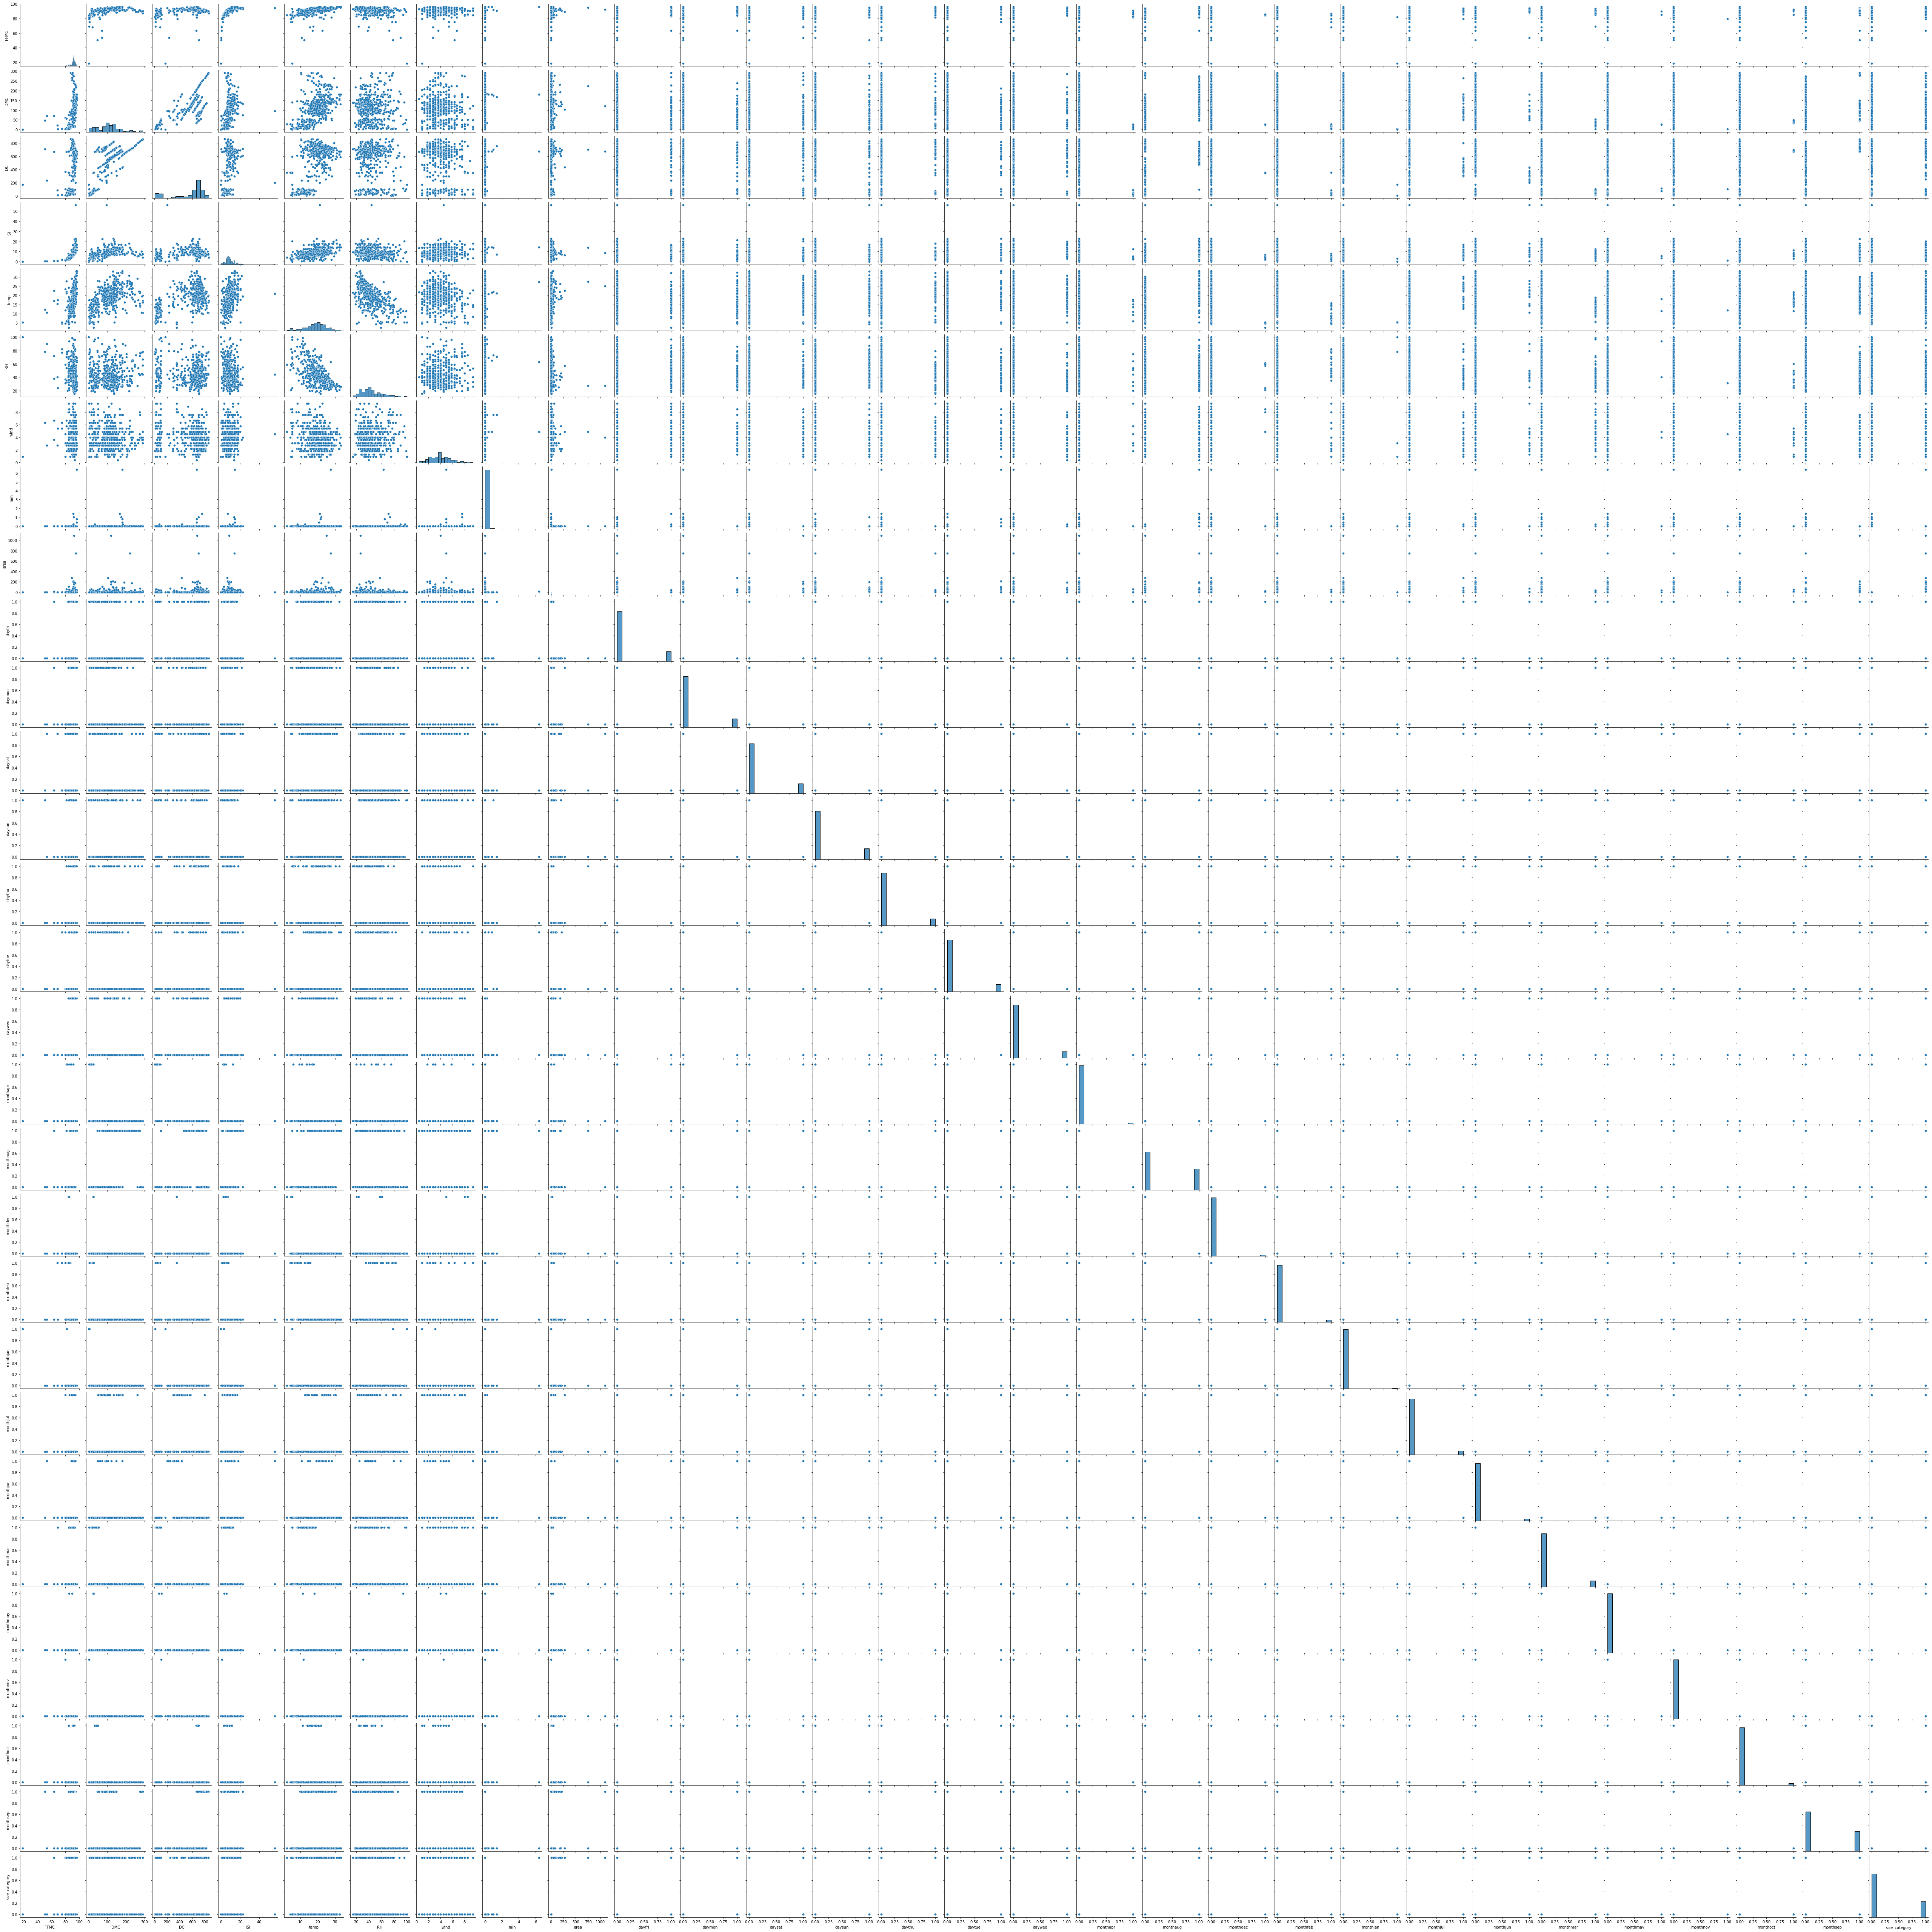

In [8]:
sns.pairplot(forestfires)

Text(0.5, 1.0, 'Correlation Map of variables')

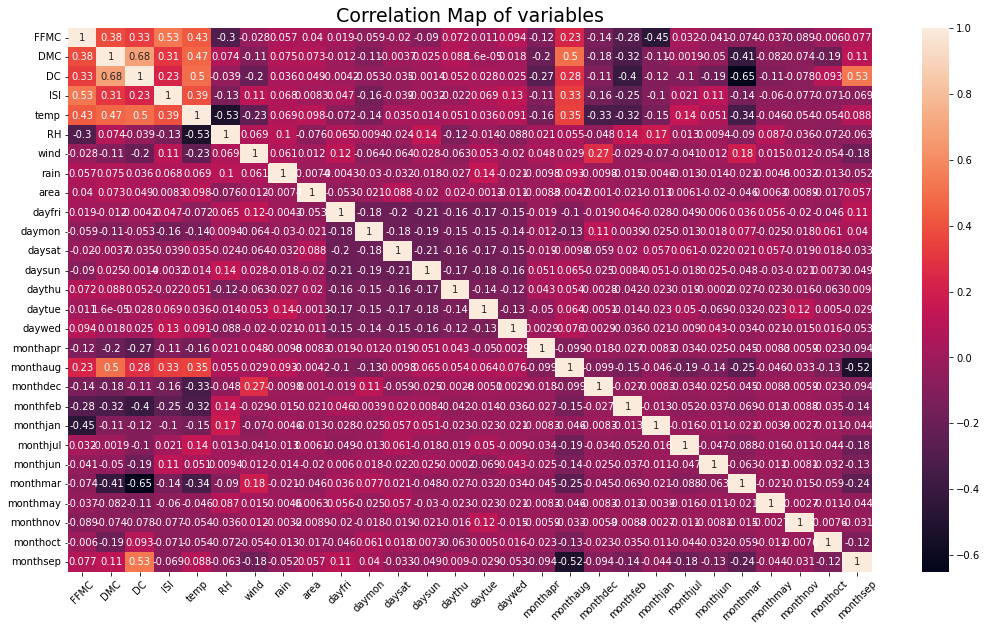

In [10]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(forestfires.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [ ]:
#Normalization being done.
def norm_func(i):
     x = (i-i.min())	/	(i.max()	-	i.min())
     return (x)

In [ ]:
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]


In [ ]:
predictors1 = norm_func(predictors)
#data = pd.concat([predictors1,target],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)


In [ ]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model 

In [ ]:
#y_train = pd.DataFrame(y_train)
first_model = prep_model([28,50,40,20,1])
x_train=x_train.astype(float)
y_train=y_train.astype(float)
first_model.fit(np.array(x_train),np.array(y_train),epochs=500)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/500
12/12 [==============================] - 1s 2ms/step - loss: 0.6743 - accuracy: 0.6870
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7313
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7313
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7313
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7313
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7313
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7313
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7313
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7313
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7313
Epoch 11/

In [ ]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

0.0    264
1.0     97
Name: size_category, dtype: int64

In [ ]:
#For training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) #100%
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))


original_class,large,small
row_0,,
large,97,0
small,0,264


In [ ]:
#For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

5/5 [==============================] - 0s 2ms/step


In [ ]:
test["original_class"].value_counts()
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) # 85%
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,30,5
small,12,109
